# MLPS vs CNN 
On image data

#### * downloading the dataset 

In [6]:
!gdown https://drive.google.com/uc?id=1XdXz0TKo_KCDRHOMvzV-YtcTx7NPG-jC

zsh:1: no matches found: https://drive.google.com/uc?id=1XdXz0TKo_KCDRHOMvzV-YtcTx7NPG-jC


In [10]:
!unzip clothing-dataset-small.zip

Archive:  clothing-dataset-small.zip
   creating: clothing-dataset-small/
  inflating: clothing-dataset-small/.DS_Store  
   creating: clothing-dataset-small/test/
   creating: clothing-dataset-small/test/skirt/
  inflating: clothing-dataset-small/test/skirt/f4b934fc-e326-4f72-b535-53288b8b82d3.jpg  
  inflating: clothing-dataset-small/test/skirt/491982c3-3e90-431e-99e6-b14ecea36384.jpg  
  inflating: clothing-dataset-small/test/skirt/24963db3-649c-4f04-8da3-0375ede8e0a6.jpg  
  inflating: clothing-dataset-small/test/skirt/32b99302-cec7-4dec-adfa-3d4029674209.jpg  
  inflating: clothing-dataset-small/test/skirt/0558b2c5-be00-49de-b27f-8c88114ac36f.jpg  
  inflating: clothing-dataset-small/test/skirt/95e66e02-b4ed-4fe9-b538-db6bac4fb7df.jpg  
  inflating: clothing-dataset-small/test/skirt/2001dec1-1e0a-4c11-9d15-120b019b3dea.jpg  
  inflating: clothing-dataset-small/test/skirt/b0e05193-cc92-4935-88d7-e71a1b19dd4b.jpg  
  inflating: clothing-dataset-small/test/skirt/309829b2-6d1a-4173-8d

### * Data visualisation

In [14]:
import os
import glob # for reading of images
import random
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import seaborn as sns 
import matplotlib .pyplot as plt 
%matplotlib inline

# Import tensorflow and its modules
import tensorflow as tf
from tensorflow import keras # this allows ‹keras.› instead of ‹tf. keras.› 
from tensorflow.keras import layers # this allows < layers.› instead of ‹tf.keras.layers>
tf.keras.utils.set_random_seed(111) # set random seed

#To supress any warnings during the flow 
import warnings
warnings.filterwarnings('ignore')

In [16]:
# List all directories in the dataset folder
class_dirs = os.listdir("clothing-dataset-small/train")

# Initialize dictionaries
image_dict = {}  # Dict to store image array for each class
count_dict = {}  # Dict to store count of files for each class

# Iterate over all class directories
for cls in class_dirs:
    # Get list of all image paths inside the subdirectory
    file_paths = glob.glob(f'clothing-dataset-small/train/{cls}/*')

    # Count number of files in each class and add to count_dict
    count_dict[cls] = len(file_paths)

    # Select a random image path from the list of file paths
    image_path = random.choice(file_paths)

    # Load image using Keras utility function and save it in image_dict
    image_dict[cls] = tf.keras.utils.load_img(image_path)


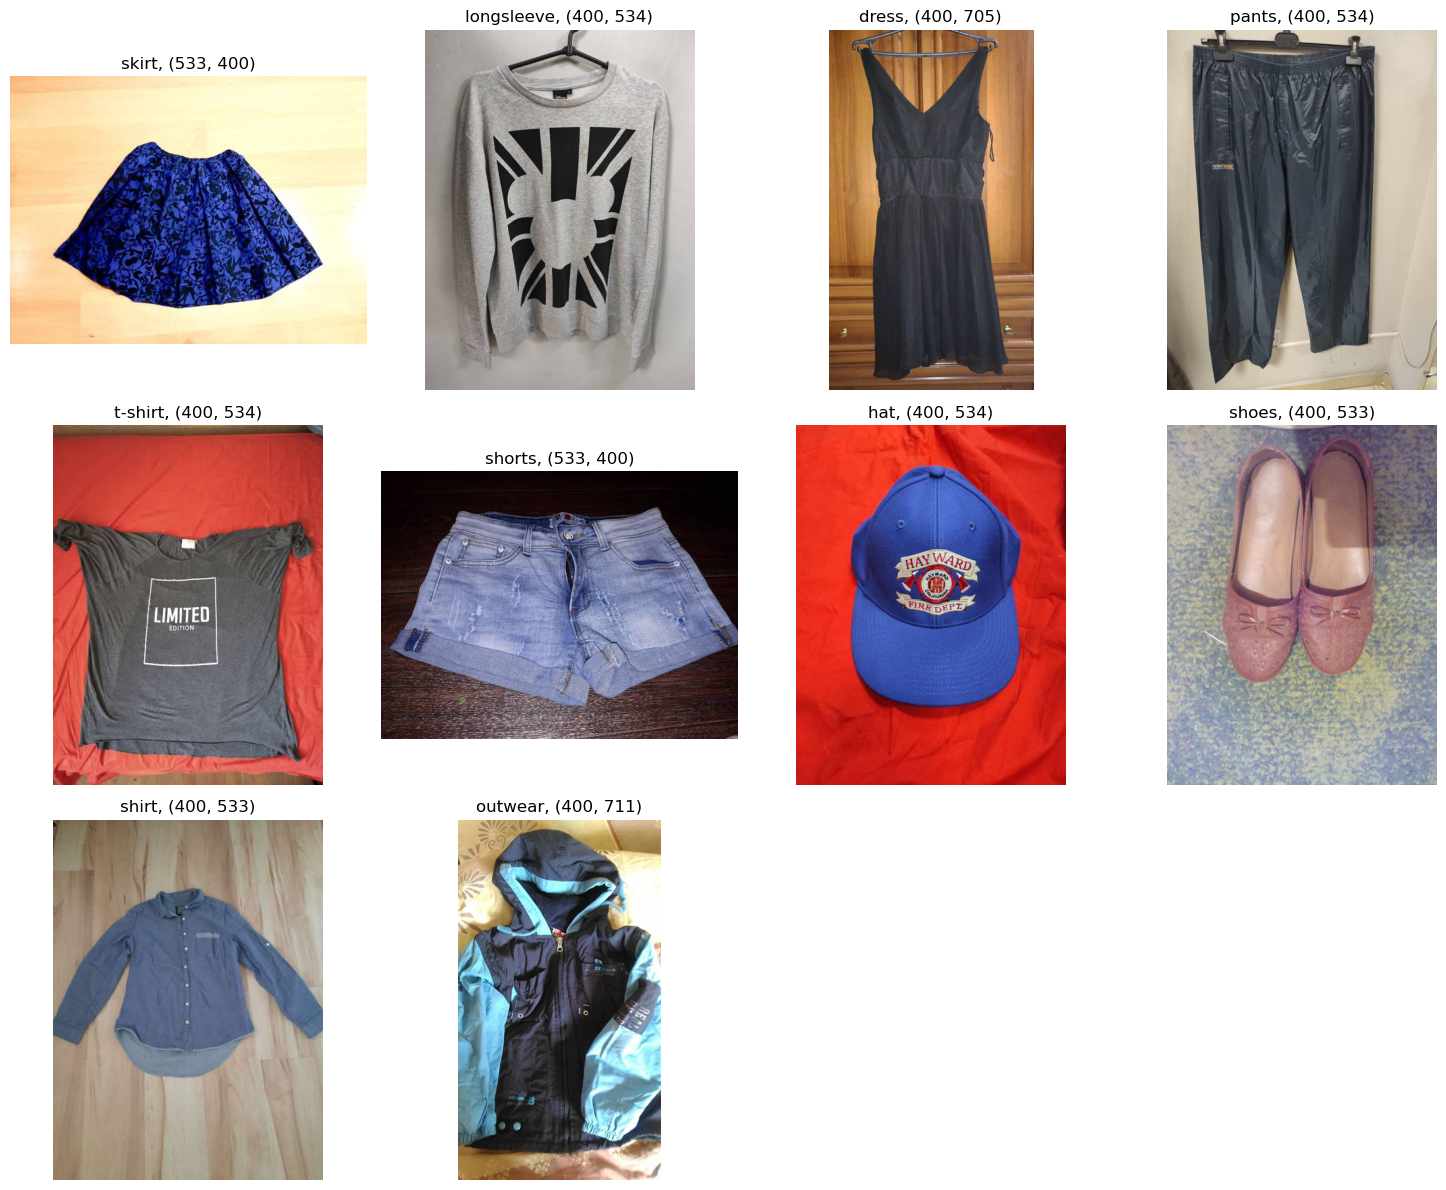

In [18]:
# Set up figure size
plt.figure(figsize=(15, 12))

# Iterate over dictionary items (class label, image array)
for i, (cls, img) in enumerate(image_dict.items()):
    # Create a subplot axis
    ax = plt.subplot(3, 4, i + 1)
    
    # Plot each image
    plt.imshow(img)
    
    # Set title with class name and image size
    plt.title(f'{cls}, {img.size}')
    
    # Turn off the axis
    plt.axis("off")

# Display the plot
plt.tight_layout()
plt.show()

Count of training samples per class: 
         class  count
0       skirt    112
1  longsleeve    455
2       dress    241
3       pants    468
4     t-shirt    795
5      shorts    202
6         hat    123
7       shoes    198
8       shirt    290
9     outwear    184


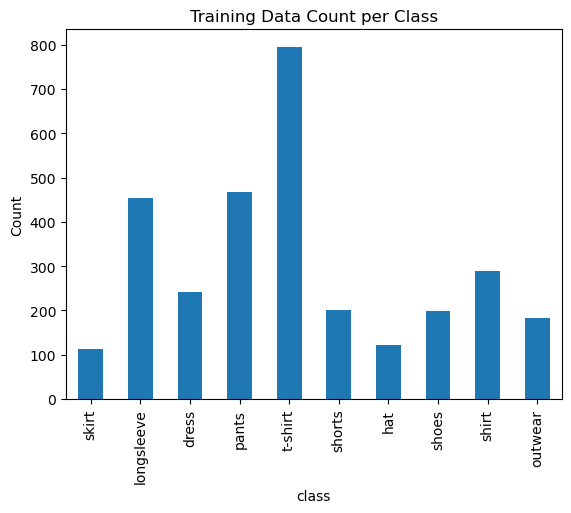

In [20]:
# Create a DataFrame from the count_dict
df_count_train = pd.DataFrame({
    "class": count_dict.keys(),
    "count": count_dict.values()
})

# Print the count of training samples per class
print("Count of training samples per class: \n", df_count_train)

# Draw a bar plot using pandas' built-in plotting function
df_count_train.plot.bar(x='class', y='count', title="Training Data Count per Class", legend=False)

# Show the plot
plt.ylabel('Count')
plt.show()

### loading the data

In [22]:
# Loading Train Data
print('\nLoading Train Data...')
train_data = tf.keras.utils.image_dataset_from_directory(
    "clothing-dataset-small/train", 
    shuffle=True
)

# Loading Validation Data
print('\nLoading Validation Data...')
val_data = tf.keras.utils.image_dataset_from_directory(
    "clothing-dataset-small/validation", 
    shuffle=False
)

# Loading Test Data
print('\nLoading Test Data...')
test_data = tf.keras.utils.image_dataset_from_directory(
    "clothing-dataset-small/test", 
    shuffle=False
)


Loading Train Data...
Found 3068 files belonging to 10 classes.

Loading Validation Data...
Found 341 files belonging to 10 classes.

Loading Test Data...
Found 372 files belonging to 10 classes.


### data Preprocessing (Resizing,rescaling,flatten)

In [48]:
# Set height and width for resizing
height, width = 128, 128  # Optional, if images need resizing

# Data Preprocessing Stage with resizing and rescaling operations
data_preprocess_with_flatten = keras.Sequential(
    name="data_preprocess_with_flatten",
    layers=[
        layers.Resizing(height, width),  # Resize images to (128, 128)
        layers.Rescaling(1./255),        # Rescale pixel values to the range [0, 1]
        
    ]
)

# Perform Data Preprocessing on the train, val, test datasets
train_ds = train_data.map(lambda x, y: (data_preprocess_with_flatten(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocess_with_flatten(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocess_with_flatten(x), y))


In [50]:
sample=next(iter(train_ds))[0]
print(sample)

tf.Tensor(
[[[[0.9229408  0.13470544 0.07196034]
   [0.9229902  0.13475487 0.07200976]
   [0.93220055 0.14396518 0.08122008]
   ...
   [0.6762557  0.03028708 0.03164494]
   [0.6677184  0.02965172 0.03807696]
   [0.67324716 0.03878019 0.05198484]]

  [[0.9263267  0.13809133 0.07534623]
   [0.9370088  0.14877345 0.08602834]
   [0.9292469  0.14101157 0.07826646]
   ...
   [0.6877909  0.02667308 0.02664723]
   [0.681141   0.02523122 0.03125539]
   [0.68465424 0.03543139 0.04505795]]

  [[0.9316669  0.14343154 0.08068645]
   [0.92637074 0.13813537 0.07539027]
   [0.92779297 0.13955761 0.07681251]
   ...
   [0.73329747 0.04893979 0.04553773]
   [0.7159466  0.037118   0.04277787]
   [0.7139237  0.04254892 0.04660334]]

  ...

  [[0.7832862  0.08242834 0.08383766]
   [0.7552028  0.09337673 0.0884135 ]
   [0.6956777  0.06773646 0.05780999]
   ...
   [0.8098017  0.09215459 0.07646832]
   [0.8186045  0.10095742 0.08527114]
   [0.81402785 0.09638074 0.08069447]]

  [[0.7768337  0.09090086 0.083298

## MLP

In [52]:
 # Define hyperparameters
num_classes = 10  # Number of output classes
hidden_size_1 = 1024  # Units in the first hidden layer
hidden_size_2 = 256   # Units in the second hidden layer
height, width = 128, 128  # Input image dimensions

# Create the Sequential model
model = keras.Sequential(
    name="model_ann",
    layers=[
        # Flatten the input image (128x128x3) into a 1D vector
        layers.Flatten(input_shape=(height, width, 3)),
        
        # First hidden layer with 1024 units and ReLU activation
        layers.Dense(units=hidden_size_1, activation='relu'),
        
        # Second hidden layer with 256 units and ReLU activation
        layers.Dense(units=hidden_size_2, activation='relu'),
        
        # Output layer with 'num_classes' units and softmax activation for classification
        layers.Dense(units=num_classes, activation='softmax')  
    ]
)


In [54]:
 model.summary()

Model: "model_ann"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │    50,332,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,597,642 (193.01 MB)

 Trainable params: 50,597,642 (193.01 MB)

 Non-trainable params: 0 (0.00 B)

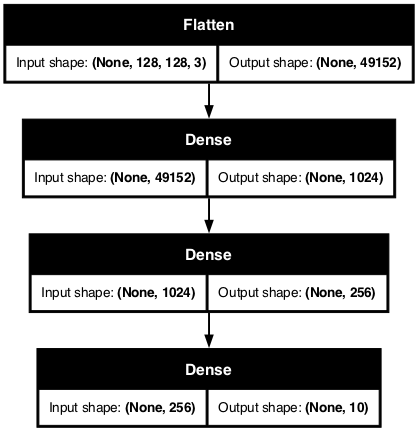

In [56]:
tf.keras.utils.plot_model(model, to_file="model_ann.png", show_shapes=True,dpi=70)

In [58]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
# Set the number of epochs
epochs = 10

# Train the model
model_fit = model.fit(
    train_ds,                 # Training dataset
    validation_data=val_ds,    # Validation dataset
    epochs=epochs              # Number of epochs
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 35s 352ms/step - accuracy: 0.1765 - loss: 24.4408 - val_accuracy: 0.3021 - val_loss: 2.8758
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 35s 359ms/step - accuracy: 0.3094 - loss: 2.9165 - val_accuracy: 0.3959 - val_loss: 2.4010
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 378ms/step - accuracy: 0.4065 - loss: 1.9772 - val_accuracy: 0.3871 - val_loss: 2.1931
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 347ms/step - accuracy: 0.4296 - loss: 1.8260 - val_accuracy: 0.3402 - val_loss: 2.0625
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 340ms/step - accuracy: 0.4625 - loss: 1.7546 - val_accuracy: 0.4223 - val_loss: 1.8107
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 40s 415ms/step - accuracy: 0.4964 - loss: 1.6088 - val_accuracy: 0.4370 - val_loss: 1.9228
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 40s 420ms/step - accuracy: 0.4921 - loss: 1.5966 - val_accuracy: 0.4194 - val_loss: 1.7427
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 40s 418ms/step - accuracy: 0.4989 - loss: 1.5041 - val_acc

In [70]:
from sklearn.metrics import accuracy_score


# Run predictions on the test dataset
y_pred = model.predict(test_ds)

# Get predicted class labels
predicted_categories = tf.argmax(y_pred, axis=1).numpy()

# Get true class labels
true_categories = np.concatenate([y for x, y in test_ds])

# Calculate accuracy
test_acc = accuracy_score(true_categories, predicted_categories) * 100
print(f'Test Accuracy: {test_acc:.2f}%')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Test Accuracy: 34.95%


In [76]:
from sklearn import metrics
def plot_confusion_matrix(model, ds, label_list):
    # Run model prediction and obtain probabilities
    y_pred = model.predict(ds)
    
    # Get list of predicted classes by taking argmax of the probabilities (y_pred)
    predicted_categories = tf.argmax(y_pred, axis=1).numpy()
    
    # Create list of all "y" labels by iterating over the dataset
    true_categories = np.concatenate([y for x, y in ds])
    
    # Generate confusion matrix
    cm = metrics.confusion_matrix(true_categories, predicted_categories)
    
    # Plot confusion matrix using seaborn
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, xticklabels=label_list, yticklabels=label_list, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


2024-09-07 21:05:51.919167: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


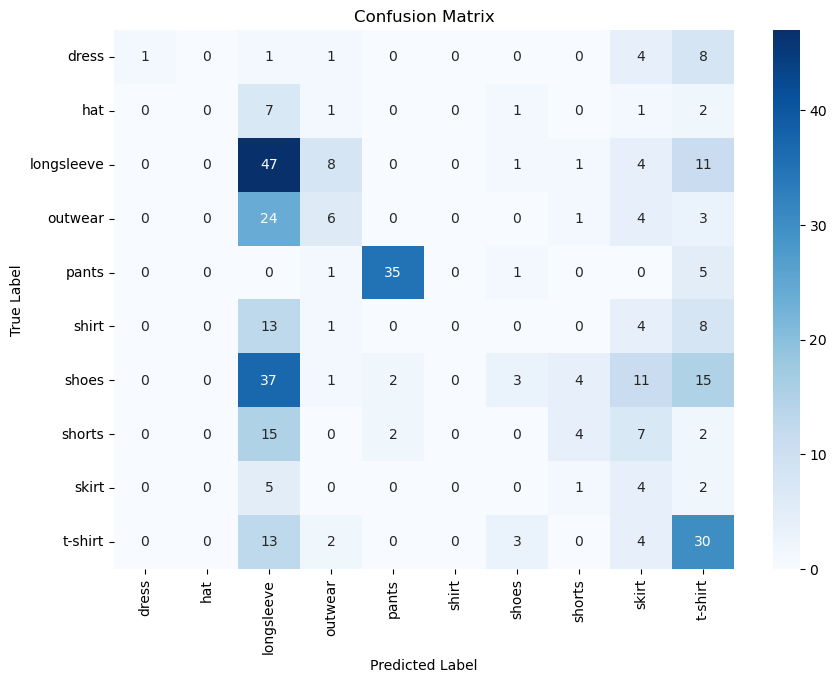

In [78]:
plot_confusion_matrix(model, test_ds, label_list=test_data.class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


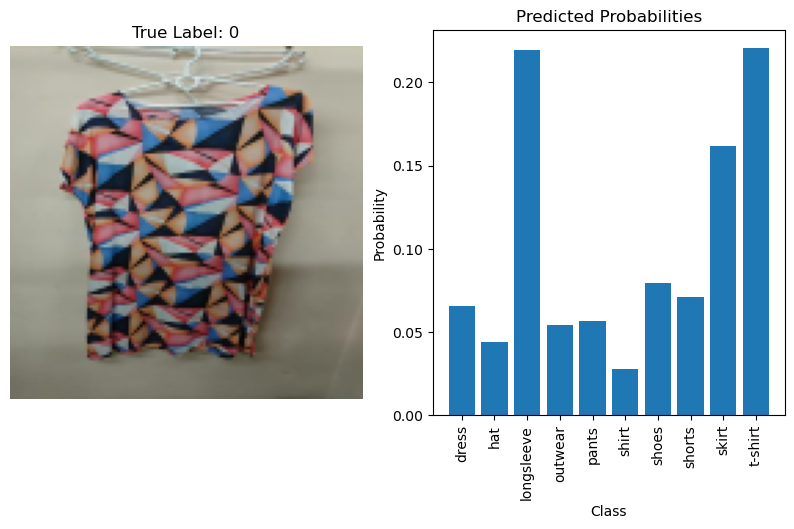

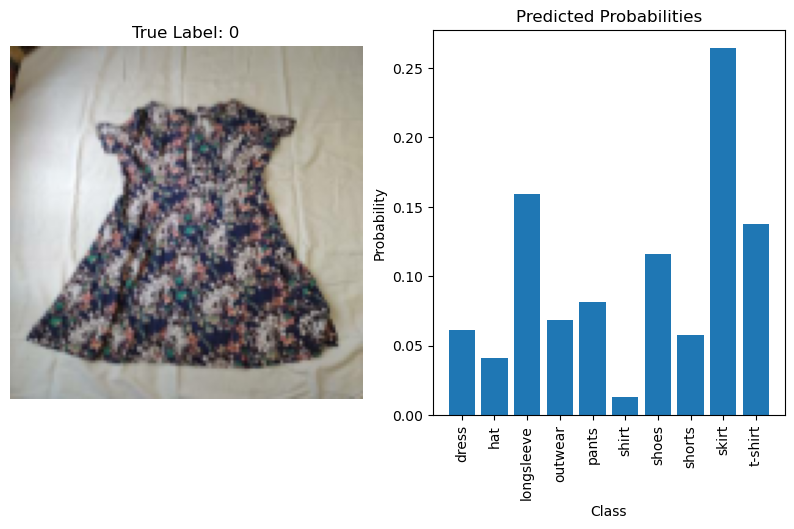

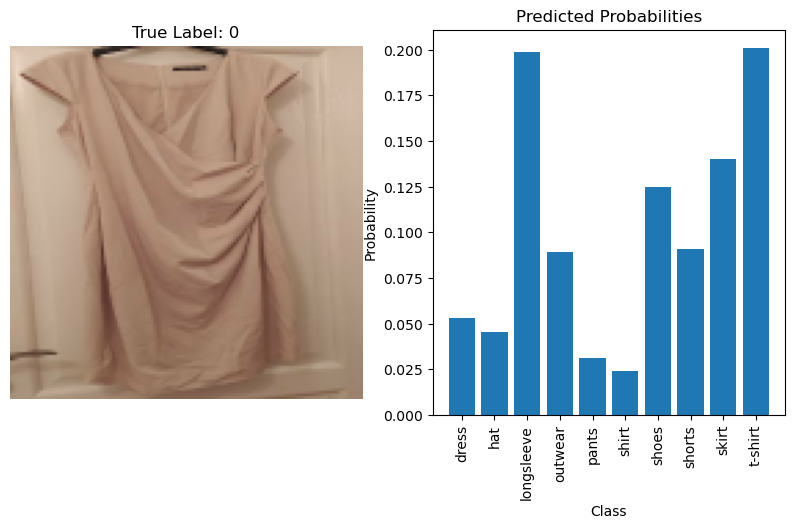

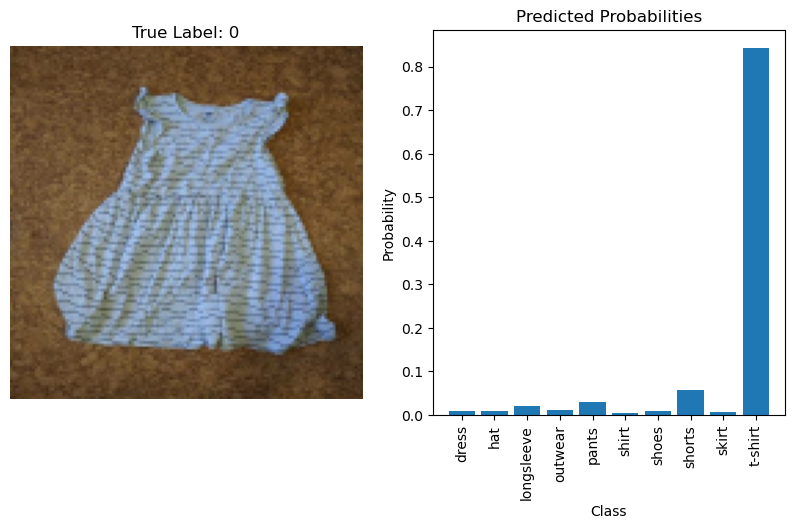

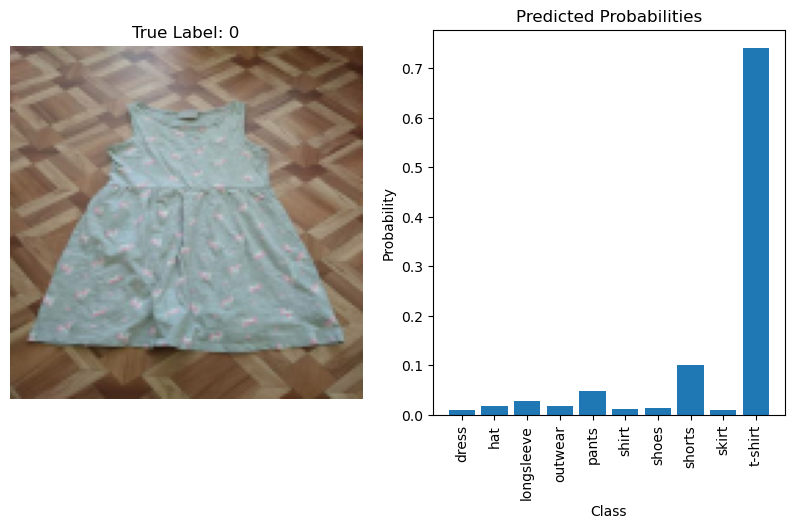

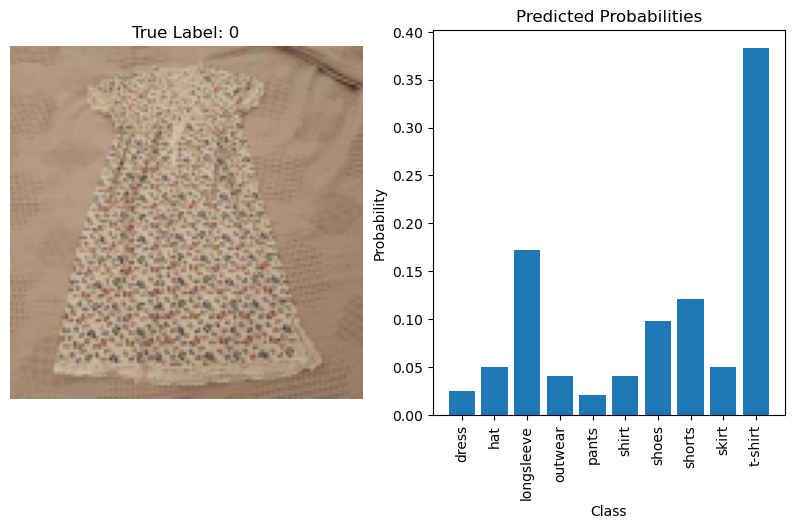

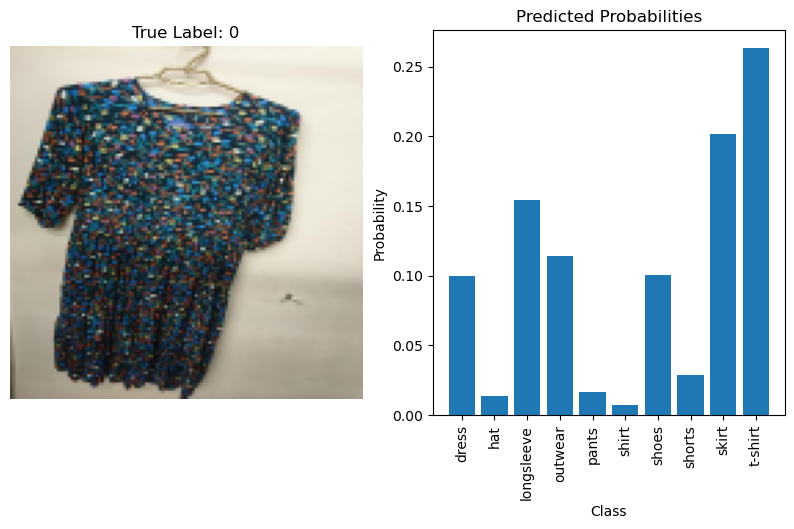

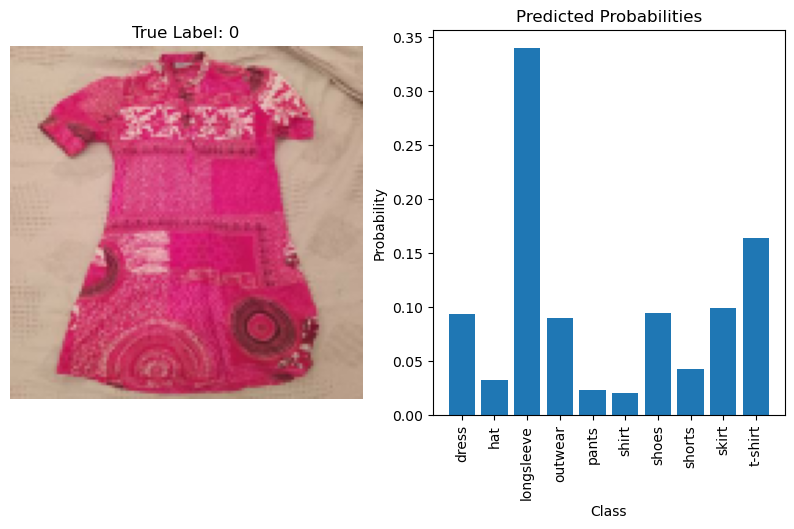

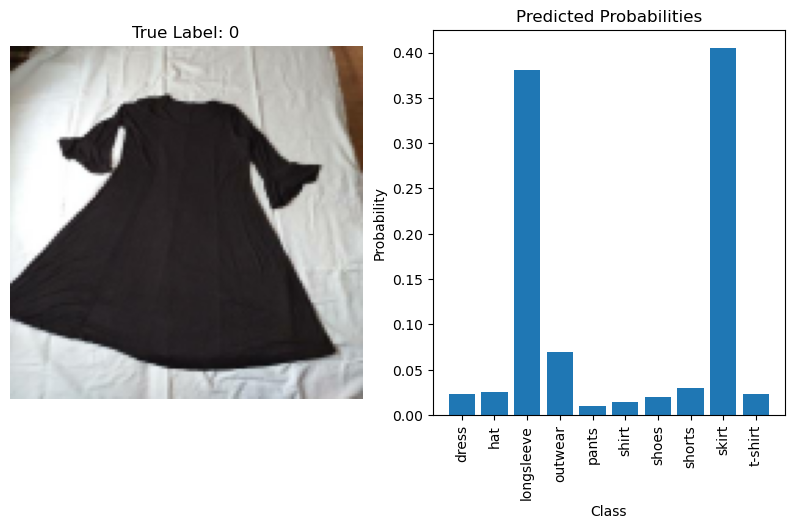

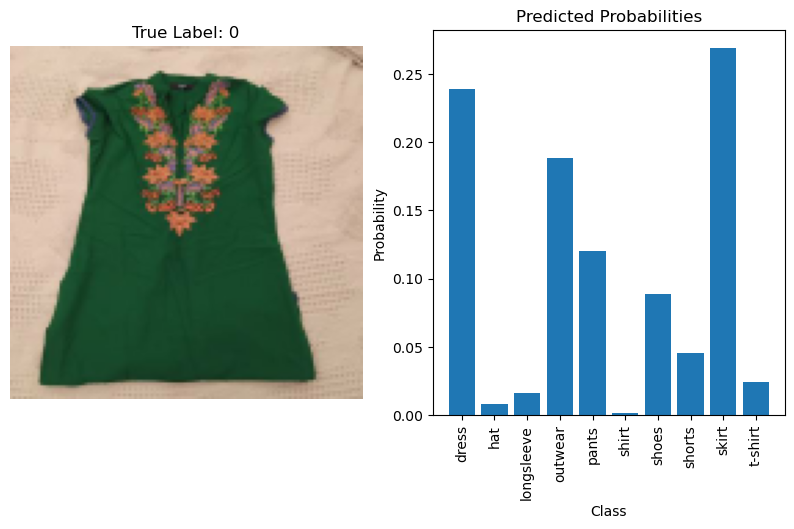

In [86]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def plot_class_probabilities(model, ds, num_samples=10):
    # Get a batch of images and their labels
    images, labels = next(iter(ds))
    
    # Get model predictions (probabilities) for the batch
    y_pred = model.predict(images)
    
    # Plot probabilities for a specified number of samples
    for i in range(num_samples):
        plt.figure(figsize=(10, 5))
        
        # Plot the image
        plt.subplot(1, 2, 1)
        plt.imshow(images[i].numpy())
        plt.title(f'True Label: {labels[i].numpy()}')
        plt.axis('off')
        
        # Plot the predicted probabilities
        plt.subplot(1, 2, 2)
        probabilities = y_pred[i]
        class_names = test_data.class_names  # Ensure this matches your dataset class names
        plt.bar(class_names, probabilities)
        plt.title(f'Predicted Probabilities')
        plt.xlabel('Class')
        plt.ylabel('Probability')
        plt.xticks(rotation=90)
        
        plt.show()

# Example usage:
plot_class_probabilities(model, test_ds)

## CNN

### simple CNN model

In [120]:
num_class=10
hidden_size=256

model=keras.Sequential(
    name="model_cnn",
    layers=[
        layers.Conv2D(filters=16,kernel_size=3,activation="relu",padding='same',strides=1,input_shape=(height,width,3)),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(units=hidden_size,activation='relu'),
        layers.Dense(units=num_class,activation='softmax')
    ]
    
)

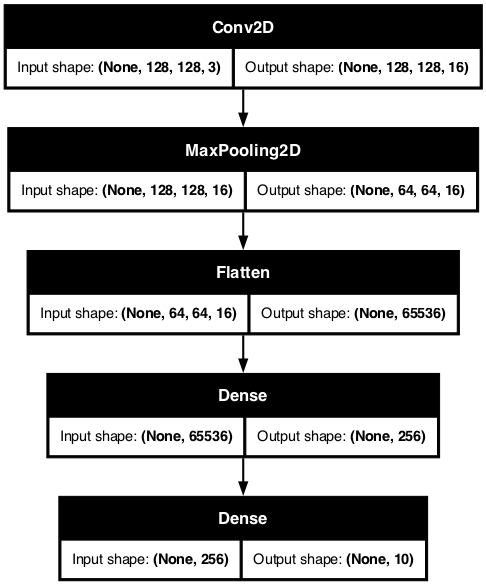

In [122]:
tf.keras.utils.plot_model(model,to_file='model.png',show_shapes=True,dpi=75)

In [124]:
model.summary()

Model: "model_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,780,490 (64.01 MB)

 Trainable params: 16,780,490 (64.01 MB)

 Non-trainable params: 0 (0.00 B)

In [131]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy'
               ,metrics=(['accuracy'])     )

In [133]:
epochs=10

model_fit=model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 282ms/step - accuracy: 0.2549 - loss: 3.4560 - val_accuracy: 0.4252 - val_loss: 1.8488
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 253ms/step - accuracy: 0.4790 - loss: 1.6093 - val_accuracy: 0.4839 - val_loss: 1.6061
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 246ms/step - accuracy: 0.6511 - loss: 1.0985 - val_accuracy: 0.5748 - val_loss: 1.4827
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 251ms/step - accuracy: 0.7917 - loss: 0.7299 - val_accuracy: 0.5953 - val_loss: 1.4262
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 253ms/step - accuracy: 0.8845 - loss: 0.4256 - val_accuracy: 0.5777 - val_loss: 1.4414
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 223ms/step - accuracy: 0.9440 - loss: 0.2226 - val_accuracy: 0.5689 - val_loss: 1.5009
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 234ms/step - accuracy: 0.9717 - loss: 0.1335 - val_accuracy: 0.5953 - val_loss: 1.5487
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 222ms/step - accuracy: 0.9902 - loss: 0.0700 - val_accu

here the validation accuracy is 60% and train has 99% & loss of train is 2% and validation loss is moreee  it is very overfitting

In [136]:
# Run predictions on the test dataset
y_pred = model.predict(test_ds)

# Get predicted class labels
predicted_categories = tf.argmax(y_pred, axis=1).numpy()

# Get true class labels
true_categories = np.concatenate([y for x, y in test_ds])

# Calculate accuracy
test_acc = accuracy_score(true_categories, predicted_categories) * 100
print(f'Test Accuracy: {test_acc:.2f}%')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Test Accuracy: 53.23%


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


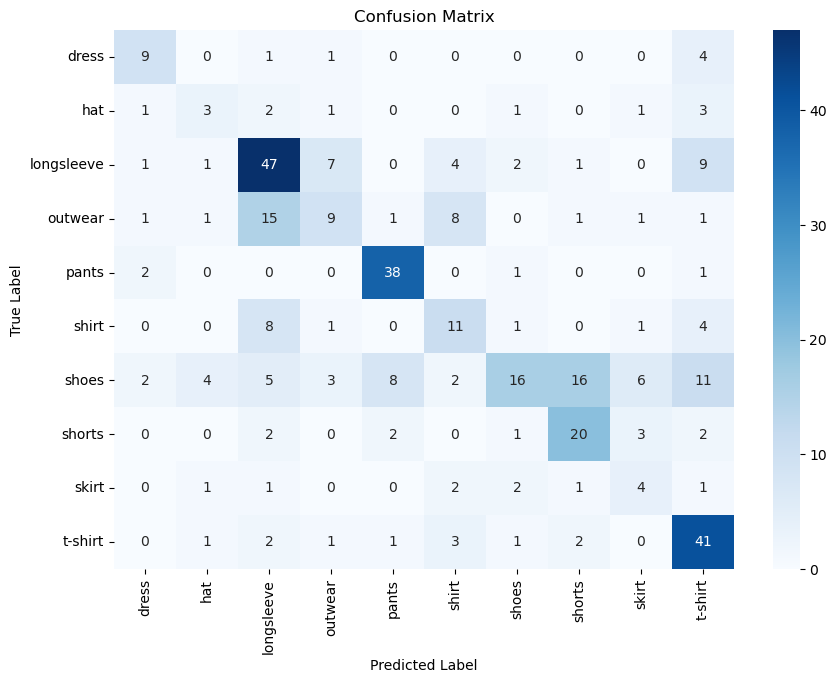

In [139]:
plot_confusion_matrix(model, test_ds, label_list=test_data.class_names)

###  using model with extra parameters

In [148]:
model = keras.Sequential(
    name="model_cnn_1",
    layers=[
        layers.Conv2D(filters=16, kernel_size=3, padding="same", activation='relu', input_shape=(128, 128, 3)),  # Assuming input images are 128x128x3
        layers.MaxPooling2D(),
        
        layers.Conv2D(filters=32, kernel_size=3, padding="same", activation='relu'),
        layers.MaxPooling2D(),
        
        layers.Conv2D(filters=64, kernel_size=3, padding="same", activation='relu'),
        layers.MaxPooling2D(),
        
        layers.Conv2D(filters=128, kernel_size=3, padding="same", activation='relu'),
        layers.MaxPooling2D(),
        
        layers.Conv2D(filters=256, kernel_size=3, padding="same", activation='relu'),
        #layers.MaxPooling2D(),
        
        # GlobalAveragePooling2D replaces Flatten for better performance on deeper networks
        layers.GlobalAveragePooling2D(),
        
        # Fully connected layers (Dense)
        layers.Dense(units=hidden_size, activation='relu'),
        layers.Dense(units=num_classes, activation='softmax')  # Output layer with softmax for classification
    ]
)

In [150]:
model.summary()

Model: "model_cnn_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 460,970 (1.76 MB)

 Trainable params: 460,970 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [152]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy'
               ,metrics=(['accuracy'])     )

#### 10 epochs

In [154]:
epochs=10

model_fit=model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 329ms/step - accuracy: 0.2522 - loss: 2.1544 - val_accuracy: 0.2522 - val_loss: 2.1488
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 355ms/step - accuracy: 0.2672 - loss: 2.1087 - val_accuracy: 0.2933 - val_loss: 2.0518
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 35s 356ms/step - accuracy: 0.3142 - loss: 1.9990 - val_accuracy: 0.3255 - val_loss: 1.9766
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 329ms/step - accuracy: 0.3721 - loss: 1.8509 - val_accuracy: 0.3372 - val_loss: 1.9084
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 348ms/step - accuracy: 0.3952 - loss: 1.7505 - val_accuracy: 0.3842 - val_loss: 1.7833
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 351ms/step - accuracy: 0.4600 - loss: 1.5892 - val_accuracy: 0.4545 - val_loss: 1.5884
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 317ms/step - accuracy: 0.5285 - loss: 1.4270 - val_accuracy: 0.4633 - val_loss: 1.5860
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 341ms/step - accuracy: 0.5984 - loss: 1.2237 - val_accu

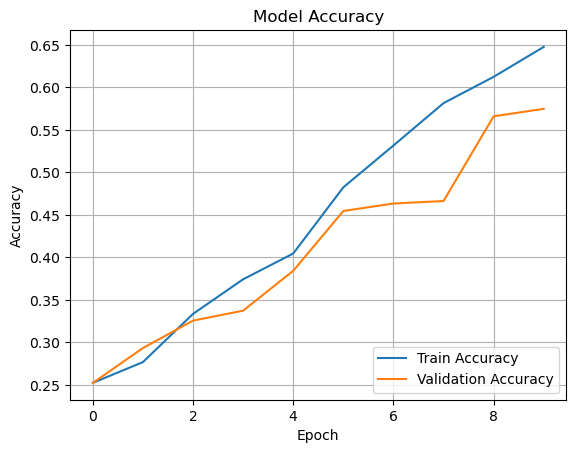

In [156]:
plt.plot(model_fit.history['accuracy'], label='Train Accuracy')
plt.plot(model_fit.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

as we saw the train and validation accuracy is increasing simultaneously with epochs so we can increase the number of epochs

#### 20 epochs

In [160]:
epochs=20

model_fit=model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 325ms/step - accuracy: 0.6667 - loss: 0.9909 - val_accuracy: 0.5982 - val_loss: 1.2001
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 35s 359ms/step - accuracy: 0.6945 - loss: 0.9256 - val_accuracy: 0.6158 - val_loss: 1.1581
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 307ms/step - accuracy: 0.7270 - loss: 0.8163 - val_accuracy: 0.5894 - val_loss: 1.2772
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 317ms/step - accuracy: 0.7361 - loss: 0.7854 - val_accuracy: 0.6510 - val_loss: 1.0249
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 351ms/step - accuracy: 0.7596 - loss: 0.6894 - val_accuracy: 0.6422 - val_loss: 1.0546
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 336ms/step - accuracy: 0.8022 - loss: 0.6031 - val_accuracy: 0.6686 - val_loss: 0.9860
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 293ms/step - accuracy: 0.8187 - loss: 0.5511 - val_accuracy: 0.6569 - val_loss: 0.9620
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 297ms/step - accuracy: 0.8286 - loss: 0.4879 - val_accu

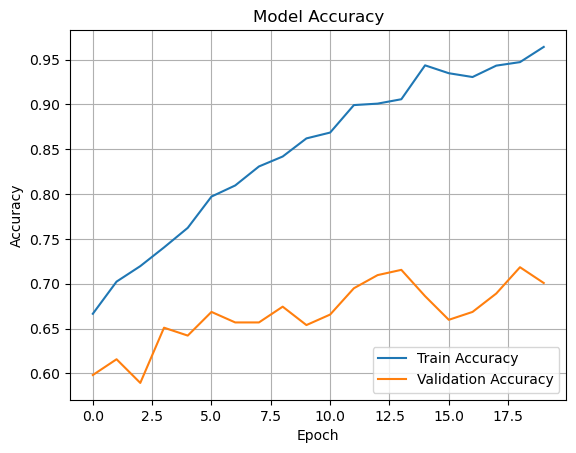

In [162]:
plt.plot(model_fit.history['accuracy'], label='Train Accuracy')
plt.plot(model_fit.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

here the train accuracy is 95% and val accuracy is 70 % better than with 10 epochs

### using batchnorm and dropout

In [198]:
model = keras.Sequential(
    name="model_cnn_2",
    layers=[
        layers.Conv2D(filters=16, kernel_size=3, padding="same", activation='relu', input_shape=(128, 128, 3)),  # Assuming input images are 128x128x3
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        
        layers.Conv2D(filters=32, kernel_size=3, padding="same", activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        
        layers.Conv2D(filters=64, kernel_size=3, padding="same", activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        
        layers.Conv2D(filters=128, kernel_size=3, padding="same", activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        
        layers.Conv2D(filters=256, kernel_size=3, padding="same", activation='relu'),
        layers.BatchNormalization(),
        #layers.MaxPooling2D(),
        
        # GlobalAveragePooling2D replaces Flatten for better performance on deeper networks
        layers.GlobalAveragePooling2D(),
        
        # Fully connected layers (Dense)
        layers.Dense(units=hidden_size, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
    
        
        layers.Dense(units=num_classes, activation='softmax')  # Output layer with softmax for classification
    ]
)

In [200]:
model.summary()

Model: "model_cnn_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 463,978 (1.77 MB)

 Trainable params: 462,474 (1.76 MB)

 Non-trainable params: 1,504 (5.88 KB)

In [202]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy'
               ,metrics=(['accuracy'])     )

In [205]:
epochs=20

model_fit=model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 49s 490ms/step - accuracy: 0.2255 - loss: 2.6165 - val_accuracy: 0.2375 - val_loss: 2.5851
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 42s 435ms/step - accuracy: 0.3626 - loss: 1.9802 - val_accuracy: 0.1613 - val_loss: 2.4036
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 421ms/step - accuracy: 0.4424 - loss: 1.7302 - val_accuracy: 0.2757 - val_loss: 2.5757
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 43s 444ms/step - accuracy: 0.5330 - loss: 1.5002 - val_accuracy: 0.3666 - val_loss: 2.0981
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 43s 444ms/step - accuracy: 0.5717 - loss: 1.3181 - val_accuracy: 0.3871 - val_loss: 1.6633
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 400ms/step - accuracy: 0.6285 - loss: 1.1260 - val_accuracy: 0.5191 - val_loss: 1.3749
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 428ms/step - accuracy: 0.6857 - loss: 0.9275 - val_accuracy: 0.5630 - val_loss: 1.2431
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 393ms/step - accuracy: 0.7261 - loss: 0.8134 - val_accu

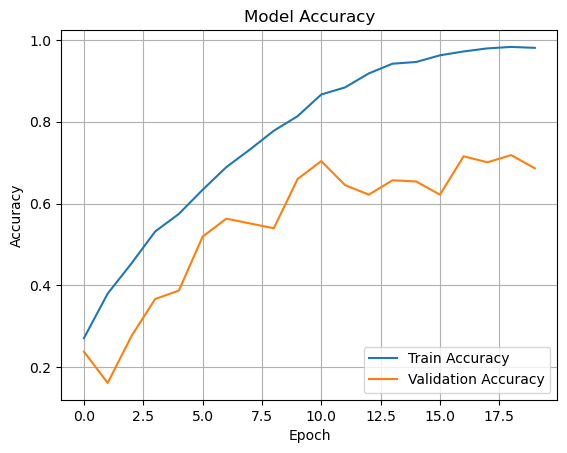

In [213]:
plt.plot(model_fit.history['accuracy'], label='Train Accuracy')
plt.plot(model_fit.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

here the train accuracy is around 98% and validation is 68% its kinda overifit but accuracy is good

### using L2 reguralisation

In [222]:
from tensorflow.keras import layers, models, regularizers
model = keras.Sequential(
        name="model_cnn_3",
        layers=[
            # First Conv2D Layer
            layers.Conv2D(filters=16, kernel_size=3, padding="same", input_shape=(height, width, 3),
                          kernel_regularizer=regularizers.l2(1e-3)),  # L2 regularization
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            
            # Second Conv2D Layer
            layers.Conv2D(filters=32, kernel_size=3, padding="same",
                          kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            
            # Third Conv2D Layer
            layers.Conv2D(filters=64, kernel_size=3, padding="same",
                          kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),

            #fourth Conv2D Layer
            layers.Conv2D(filters=256, kernel_size=3, padding="same",
                          kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            
            # GlobalAveragePooling and Fully Connected Layers
            layers.GlobalAveragePooling2D(),
            layers.Dense(units=hidden_size, activation='relu', kernel_regularizer=regularizers.l2(1e-3)),
            layers.BatchNormalization(),
            layers.Dropout(0.5),  # Dropout for regularization
            
            # Output Layer with Softmax for classification
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    

In [224]:
model.summary()

Model: "model_cnn_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 16, 16, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,154 (945.91 KB)

 Trainable params: 240,906 (941.04 KB)

 Non-trainable params: 1,248 (4.88 KB)

In [226]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy'
               ,metrics=(['accuracy'])     )

In [228]:
epochs=15

model_fit=model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 42s 417ms/step - accuracy: 0.1825 - loss: 3.4826 - val_accuracy: 0.2375 - val_loss: 2.8046
Epoch 2/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 42s 431ms/step - accuracy: 0.3074 - loss: 2.8331 - val_accuracy: 0.2375 - val_loss: 3.0002
Epoch 3/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 486ms/step - accuracy: 0.3628 - loss: 2.5477 - val_accuracy: 0.2170 - val_loss: 3.4953
Epoch 4/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 53s 547ms/step - accuracy: 0.4085 - loss: 2.3013 - val_accuracy: 0.2991 - val_loss: 2.8556
Epoch 5/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 50s 513ms/step - accuracy: 0.4473 - loss: 2.1817 - val_accuracy: 0.4018 - val_loss: 2.3566
Epoch 6/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 49s 503ms/step - accuracy: 0.4799 - loss: 2.0289 - val_accuracy: 0.4252 - val_loss: 2.1046
Epoch 7/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 48s 501ms/step - accuracy: 0.5346 - loss: 1.8630 - val_accuracy: 0.4545 - val_loss: 2.0787
Epoch 8/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 483ms/step - accuracy: 0.5669 - loss: 1.7331 - val_accu

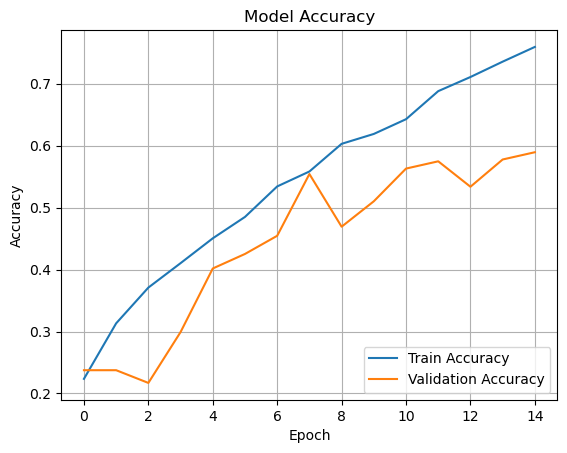

In [229]:
plt.plot(model_fit.history['accuracy'], label='Train Accuracy')
plt.plot(model_fit.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

here the both accuracy is below down but we have to check every aspect that model work do whaterver best for your data

## Data Augmentation

Data augmentation is a technique used to artificially increase the size and diversity of your training dataset by applying random transformations to the images. This helps improve the generalization ability of your model and reduce overfitting.
types are:

Geometric Transformations:
Flip (Horizontal, Vertical)
Rotation
Zoom
Translation (Shift)
Shearing
Cropping

Color Space Adjustments:
Brightness Adjustment
Contrast Adjustment
Saturation Adjustment
Hue Adjustment

Noise Injection:
Gaussian Noise
Salt-and-Pepper Noise
Blurring and Sharpening:
Gaussian Blur
Motion Blur
Sharpening

Occlusion:
Random Erasing
Cutout
Mixing Images:
Mixup
CutMix

Normalization and Standardization:
Rescaling
Mean-Std Normalization
Perspective Transformations:
Random Warp
Elastic Distortion

#### if you are using image directly from web :

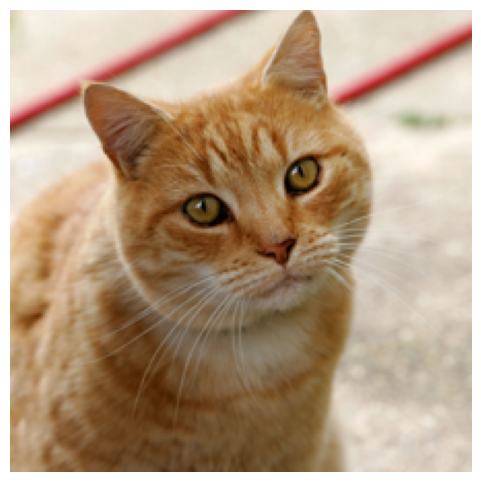

In [301]:
import requests
from PIL import Image
import numpy as np
import io
import matplotlib.pyplot as plt

def load_image_from_url(url, output_size=(300, 300)):
    """Load an image from a URL and resize it to the specified size."""
    # Download the image
    response = requests.get(url)
    response.raise_for_status()  # Check for request errors
    
    # Open the image
    image = Image.open(io.BytesIO(response.content))
    
    # Resize the image
    image = image.resize(output_size)
    
    # Convert the image to a NumPy array
    img_array = np.array(image)
    return img_array

def show_image(img_array):
    """Display a single image using matplotlib."""
    plt.figure(figsize=(6, 6))
    plt.imshow(img_array)
    plt.axis('off')
    plt.show()

# Example usage
image_url = "https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg"  # Replace with your image URL
try:
    img_array = load_image_from_url(image_url, output_size=(224, 224))
    show_image(img_array)
except requests.HTTPError as e:
    print(f"HTTP error occurred: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


## using data augmentation in obove CNN model

In [329]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

def preprocess_v2(train_data, val_data, test_data, target_height=128, target_width=128):
    # Data Processing Stage with resizing and rescaling operations
    data_preprocess = Sequential(
        name="data_preprocess",
        layers=[
            layers.Resizing(target_height, target_width),
            layers.Rescaling(1.0 / 255),
        ]
    )

    # Data Augmentation Stage with resizing and random cropping
    data_augmentation = Sequential(
        name="data_augmentation",
        layers=[
            layers.Resizing(156, 156),  # First resize to 156x156
            layers.RandomCrop(target_height, target_width),  # Then randomly crop to target dimensions
            layers.RandomFlip("horizontal"),  # Optional: Randomly flip images horizontally
            layers.RandomRotation(0.2),  # Optional: Randomly rotate images by up to 20 degrees
            layers.RandomZoom(0.2),  # Optional: Randomly zoom images
            layers.RandomBrightness(0.2)  # Optional: Randomly change brightness
        ]
    )

    # Apply preprocessing to datasets
    train_ds = train_data.map(lambda x, y: (data_preprocess(x), y))
    val_ds = val_data.map(lambda x, y: (data_preprocess(x), y))
    test_ds = test_data.map(lambda x, y: (data_preprocess(x), y))

    return train_ds, val_ds, test_ds

# Example usage
# Assuming `train_data`, `val_data`, and `test_data` are already defined as tf.data.Dataset objects
train_ds, val_ds, test_ds = preprocess_v2(train_data, val_data, test_data)


In [337]:
model.summary()

Model: "model_cnn_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 16, 16, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 723,968 (2.76 MB)

 Trainable params: 240,906 (941.04 KB)

 Non-trainable params: 1,248 (4.88 KB)

 Optimizer params: 481,814 (1.84 MB)

In [339]:
model_fit=model.fit(train_ds,validation_data=val_ds,epochs=30)

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 45s 463ms/step - accuracy: 0.7834 - loss: 1.0303 - val_accuracy: 0.5601 - val_loss: 1.7321
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 426ms/step - accuracy: 0.8159 - loss: 0.9342 - val_accuracy: 0.5425 - val_loss: 1.8802
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 51s 526ms/step - accuracy: 0.8449 - loss: 0.8456 - val_accuracy: 0.5337 - val_loss: 1.8656
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 51s 530ms/step - accuracy: 0.8500 - loss: 0.8245 - val_accuracy: 0.6070 - val_loss: 1.9662
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 51s 523ms/step - accuracy: 0.8719 - loss: 0.7696 - val_accuracy: 0.5543 - val_loss: 2.1265
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 40s 413ms/step - accuracy: 0.8912 - loss: 0.7198 - val_accuracy: 0.5161 - val_loss: 2.4956
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 48s 502ms/step - accuracy: 0.9098 - loss: 0.6551 - val_accuracy: 0.6158 - val_loss: 1.9235
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 44s 451ms/step - accuracy: 0.9188 - loss: 0.6381 - val_accu

various time here the accuracy got increased 